In [468]:
import pandas as pd
import polars as pl
import polars.selectors as cs

import seaborn as sns
import matplotlib.pyplot as plt

In [469]:
pl.Config.set_tbl_width_chars(200)


polars.config.Config

In [470]:
path  = './youtube/GBvideos.csv'

# Data

In [491]:
%%time
df_pl = pl.read_csv(path)

CPU times: user 101 ms, sys: 89.8 ms, total: 191 ms
Wall time: 160 ms


In [492]:
%%time
df_pd = pd.read_csv(path)

CPU times: user 253 ms, sys: 29.9 ms, total: 283 ms
Wall time: 283 ms


## Common Exploratory Methods

In [493]:
print(df_pd.shape)
display(df_pd.head(2))
display(df_pd.tail(2))
display(df_pd.sample(2))

(38916, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...
38915,4YFo4bdMO8Q,18.14.06,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,2018-05-11T04:06:35.000Z,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
36901,qPpUaeChvuY,18.03.06,Kanye West on His New Album 'Ye' At His Album ...,BigBoyTV,24,2018-06-02T23:19:09.000Z,"kanye west|""ye""|""good music""|""kim kardashian""|...",133150,6597,164,1249,https://i.ytimg.com/vi/qPpUaeChvuY/default.jpg,False,False,False,————————————SUBSCRIBE————————————► https://bit...
27566,7GD1oeLeGUU,18.03.04,CNCO - Bonita (Official Video),CNCOVEVO,10,2018-03-16T07:00:01.000Z,"Bonita CNCO Official Music Video CNCO|""CNCO Mu...",11598307,372477,12302,35090,https://i.ytimg.com/vi/7GD1oeLeGUU/default.jpg,False,False,False,CNCO – “Bonita”\n\nPREORDER “CNCO” NOW!: \n\n...


In [494]:
print(df_pl.shape)
print(df_pl.head(2))
print(df_pl.tail(2))
print(df_pl.sample(2))

(38916, 16)
shape: (2, 16)
┌─────────────┬───────────────┬───────────────────────────────────┬─────────────────────┬───┬───────────────────┬──────────────────┬────────────────────────┬───────────────────────────────────┐
│ video_id    ┆ trending_date ┆ title                             ┆ channel_title       ┆ … ┆ comments_disabled ┆ ratings_disabled ┆ video_error_or_removed ┆ description                       │
│ ---         ┆ ---           ┆ ---                               ┆ ---                 ┆   ┆ ---               ┆ ---              ┆ ---                    ┆ ---                               │
│ str         ┆ str           ┆ str                               ┆ str                 ┆   ┆ bool              ┆ bool             ┆ bool                   ┆ str                               │
╞═════════════╪═══════════════╪═══════════════════════════════════╪═════════════════════╪═══╪═══════════════════╪══════════════════╪════════════════════════╪═══════════════════════════════════╡
│ J

## Column Selection

### Data Types

In [495]:
%%timeit
numeric_data_pl = df_pl.select(cs.numeric())
categorical_data_pl = df_pl.select(cs.string())

82.5 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [496]:
%%timeit
numeric_data_pd = df_pd.select_dtypes(include="number")
categorical_data_pd = df_pd.select_dtypes(exclude="number")

640 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [497]:
print(numeric_data_pl.head())

shape: (5, 5)
┌─────────────┬──────────┬────────┬──────────┬───────────────┐
│ category_id ┆ views    ┆ likes  ┆ dislikes ┆ comment_count │
│ ---         ┆ ---      ┆ ---    ┆ ---      ┆ ---           │
│ i64         ┆ i64      ┆ i64    ┆ i64      ┆ i64           │
╞═════════════╪══════════╪════════╪══════════╪═══════════════╡
│ 26          ┆ 7224515  ┆ 55681  ┆ 10247    ┆ 9479          │
│ 24          ┆ 1053632  ┆ 25561  ┆ 2294     ┆ 2757          │
│ 10          ┆ 17158579 ┆ 787420 ┆ 43420    ┆ 125882        │
│ 17          ┆ 27833    ┆ 193    ┆ 12       ┆ 37            │
│ 25          ┆ 9815     ┆ 30     ┆ 2        ┆ 30            │
└─────────────┴──────────┴────────┴──────────┴───────────────┘


In [498]:
print(categorical_data_pl.head())

shape: (5, 8)
┌─────────────┬───────────────┬─────────────────────────────┬───────────────────────┬──────────────────────────┬─────────────────────────────┬────────────────────────────┬────────────────────────────┐
│ video_id    ┆ trending_date ┆ title                       ┆ channel_title         ┆ publish_time             ┆ tags                        ┆ thumbnail_link             ┆ description                │
│ ---         ┆ ---           ┆ ---                         ┆ ---                   ┆ ---                      ┆ ---                         ┆ ---                        ┆ ---                        │
│ str         ┆ str           ┆ str                         ┆ str                   ┆ str                      ┆ str                         ┆ str                        ┆ str                        │
╞═════════════╪═══════════════╪═════════════════════════════╪═══════════════════════╪══════════════════════════╪═════════════════════════════╪════════════════════════════╪═══════════

### Column names

In [499]:
subset_pl = df_pl.select(
    pl.col("likes"), 
    pl.col("views"),
    pl.col("comment_count")
)
susbet_pd = df_pd[["likes", "views", "comment_count"]]

## Row Selection

#### Filtering

In [500]:
filtered_pl = df_pl.filter(pl.col("views") < 1000)
filtered_pl.shape

(6, 16)

In [501]:
filtered_pd = df_pd[df_pd['views'] < 1000]
filtered_pd.shape

(6, 16)

## Data Quality Checks

In [502]:
%%time
missing = df_pd.isna().sum()
missing = missing[missing > 0]
static = df_pd.nunique() == 1
static = static[static]

print("Missing rows:")
print(missing)
print("\nStatic Columns:")
print(static)

Missing rows:
description    612
dtype: int64

Static Columns:
Series([], dtype: bool)
CPU times: user 50.4 ms, sys: 1.4 ms, total: 51.8 ms
Wall time: 50.9 ms


In [503]:
%%time
missing = (
    df_pl.select(pl.all().is_null().sum())
    .melt(value_name="missing")
    .filter(pl.col("missing") > 0)
)
static = (
    df_pl.select(pl.all().n_unique())
    .melt(value_name="unique")
    .filter(pl.col("unique") == 1)
)
print("Missing columns:")
print(missing)

print("\nStatic columns:")
print(static)

Missing columns:
shape: (0, 2)
┌──────────┬─────────┐
│ variable ┆ missing │
│ ---      ┆ ---     │
│ str      ┆ u32     │
╞══════════╪═════════╡
└──────────┴─────────┘

Static columns:
shape: (0, 2)
┌──────────┬────────┐
│ variable ┆ unique │
│ ---      ┆ ---    │
│ str      ┆ u32    │
╞══════════╪════════╡
└──────────┴────────┘
CPU times: user 17.4 ms, sys: 7.44 ms, total: 24.8 ms
Wall time: 8.07 ms


## Cleaning

### Date Conversion

In [504]:
%%time
df_pd['publish_time'] = pd.to_datetime(df_pd['publish_time'])
df_pd['trending_date'] = pd.to_datetime(
    df_pd['trending_date'], format='%y.%d.%m'
)

CPU times: user 7.71 ms, sys: 934 µs, total: 8.64 ms
Wall time: 7.77 ms


In [505]:
%%time
df_pl = df_pl.with_columns(
    pl.col('trending_date').str.to_date(format='%y.%d.%m'),
    pl.col('publish_time').str.to_datetime()
)

CPU times: user 10.2 ms, sys: 1.53 ms, total: 11.8 ms
Wall time: 9.83 ms


### Category ID lookup

In [506]:
import json

with open('./youtube/US_category_id.json', 'r') as f:
    categories = json.load(f)
    
id_to_category = {}
for c in categories['items']:
    id_to_category[int(c['id'])] = c['snippet']['title']

In [507]:
%%time
df_pd['category_id'] = df_pd['category_id'].map(id_to_category)

CPU times: user 1.07 ms, sys: 827 µs, total: 1.9 ms
Wall time: 1.31 ms


In [508]:
%%time
df_pl = df_pl.with_columns(pl.col("category_id").map_dict(id_to_category))

CPU times: user 2.11 ms, sys: 4.29 ms, total: 6.4 ms
Wall time: 1.9 ms


## Univariate Analysis

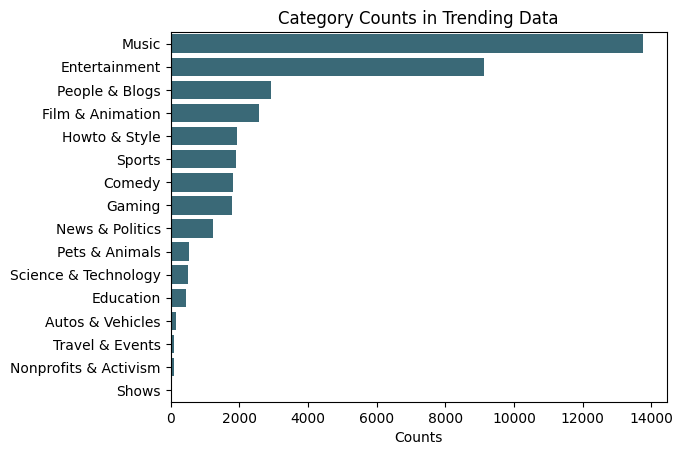

In [509]:
category_counts = df_pl["category_id"].value_counts(sort=True)

# Barplot
sns.barplot(
    y=category_counts["category_id"].to_numpy(),
    x=category_counts["counts"].to_numpy(),
    color="#306e81",
)
plt.title("Category Counts in Trending Data")
plt.xlabel("Counts")
plt.show()

In [510]:
views_stats = df_pl.select(pl.col("views")).describe()
print(views_stats)

shape: (9, 2)
┌────────────┬──────────────┐
│ describe   ┆ views        │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 38916.0      │
│ null_count ┆ 0.0          │
│ mean       ┆ 5.9119e6     │
│ std        ┆ 1.9001e7     │
│ min        ┆ 851.0        │
│ max        ┆ 4.24538912e8 │
│ median     ┆ 981889.0     │
│ 25%        ┆ 251532.0     │
│ 75%        ┆ 3.683945e6   │
└────────────┴──────────────┘


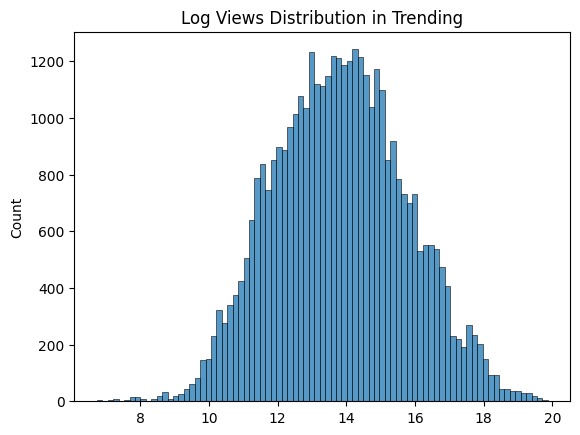

In [511]:
sns.histplot(df_pl['views'].log())
plt.title("Log Views Distribution in Trending")
plt.show()

## Multivariate Analysis

### Category Analysis

In [512]:
views_by_category = df_pl.groupby(pl.col("category_id")).agg(pl.col("views").median().alias("median_views")).sort("median_views", descending=True)
print(views_by_category)

shape: (16, 2)
┌──────────────────┬──────────────┐
│ category_id      ┆ median_views │
│ ---              ┆ ---          │
│ str              ┆ f64          │
╞══════════════════╪══════════════╡
│ Music            ┆ 2.980744e6   │
│ Shows            ┆ 1498767.5    │
│ Comedy           ┆ 1278302.5    │
│ Film & Animation ┆ 1.144917e6   │
│ …                ┆ …            │
│ Gaming           ┆ 309154.5     │
│ Howto & Style    ┆ 263412.0     │
│ News & Politics  ┆ 229753.0     │
│ Travel & Events  ┆ 218176.0     │
└──────────────────┴──────────────┘


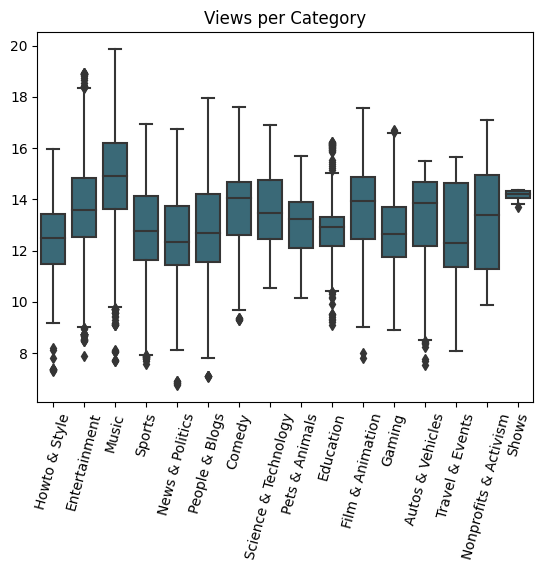

In [513]:
sns.boxplot(x=df_pl['category_id'].to_numpy(), y=df_pl['views'].log().to_numpy(), color="#306e81")
plt.title("Views per Category")
plt.xticks(rotation=75)
plt.show()

### Channel Analysis

In [515]:
# Who's the most frequent channels?
print(df_pl['channel_title'].value_counts(sort=True).head(5))

shape: (5, 2)
┌───────────────────────────────────┬────────┐
│ channel_title                     ┆ counts │
│ ---                               ┆ ---    │
│ str                               ┆ u32    │
╞═══════════════════════════════════╪════════╡
│ The Tonight Show Starring Jimmy … ┆ 208    │
│ TheEllenShow                      ┆ 207    │
│ Jimmy Kimmel Live                 ┆ 207    │
│ Saturday Night Live               ┆ 206    │
│ WWE                               ┆ 205    │
└───────────────────────────────────┴────────┘


In [516]:
channel_popularity = (
    df_pl.groupby(pl.col("channel_title"))
    .agg(pl.count().alias("trending_count"))
    .sort(pl.col("trending_count"), descending=True)
)

print(channel_popularity.head())

shape: (5, 2)
┌───────────────────────────────────┬────────────────┐
│ channel_title                     ┆ trending_count │
│ ---                               ┆ ---            │
│ str                               ┆ u32            │
╞═══════════════════════════════════╪════════════════╡
│ The Tonight Show Starring Jimmy … ┆ 208            │
│ TheEllenShow                      ┆ 207            │
│ Jimmy Kimmel Live                 ┆ 207            │
│ Saturday Night Live               ┆ 206            │
│ WWE                               ┆ 205            │
└───────────────────────────────────┴────────────────┘


In [518]:
# Who's the most frequent channels?
print(df_pd['channel_title'].value_counts(sort=True).head(5))

The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
Name: channel_title, dtype: int64


In [519]:
channel_stats_pl = df_pl.groupby("channel_title").agg([
    pl.count().alias("trending_count"),
    pl.col("title").n_unique().alias("number_of_trending_videos"),
    pl.col("views").sum().alias("total_views"),
    pl.col("likes").sum().alias("total_likes"),
    pl.col("comment_count").sum().alias("total_comments"),
    pl.col("views").mean().alias("average_views"),
    pl.col("likes").mean().alias("average_likes"),
    pl.col("comment_count").mean().alias("average_comments"),
])
channel_stats_pl.sample(5)

channel_title,trending_count,number_of_trending_videos,total_views,total_likes,total_comments,average_views,average_likes,average_comments
str,u32,u32,i64,i64,i64,f64,f64,f64
"""booksandquills…",12,1,160423,10760,607,13368.583333,896.666667,50.583333
"""World of Warcr…",3,1,22384929,411173,78667,7.461643e6,137057.666667,26222.333333
"""LIVELOVEASAPVE…",40,2,539784252,15141314,721862,1.3495e7,378532.85,18046.55
"""NBA on TNT""",17,1,11087798,118894,57585,652223.411765,6993.764706,3387.352941
"""Camila Cabello…",57,4,80892709,7165674,476789,1.4192e6,125713.578947,8364.719298


In [520]:
def make_aggregates(df: pl.DataFrame, groupby: str, agg_features: list[str]) -> pl.DataFrame:
    # Aggregates that measure popularity using video counts
    popularity_aggs = [
        pl.count().alias("trending_count"),
        pl.col("title").n_unique().alias("number_of_trending_videos"),
    ]
    # Aggregates that measure popularity using metrics of the videos
    metrics_agg = []
    for agg in agg_features:
        if agg not in df.columns:
            print(f"{agg} not in the dataframe. Skipping...")
        else:
            metrics_agg.append(pl.col(agg).sum().alias(f"total_{agg}"))
            metrics_agg.append(pl.col(agg).mean().alias(f"average_{agg}"))

    stats = df.groupby(groupby).agg(popularity_aggs + metrics_agg)
    stats = stats.sort("trending_count", descending=True)
    return stats

In [521]:
channel_aggs = make_aggregates(
    df=df_pl, groupby="channel_title", agg_features=["views", "likes", "comment_count"]
)
category_aggs = make_aggregates(
    df=df_pl, groupby="category_id", agg_features=["views", "likes", "comment_count"]
)

print("Top Channels")
print(channel_aggs.head())

print("\nTop Categories")
print(category_aggs.head())

Top Channels
shape: (5, 9)
┌───────────────────────────────────┬────────────────┬───────────────────────────┬─────────────┬───┬─────────────┬───────────────┬─────────────────────┬───────────────────────┐
│ channel_title                     ┆ trending_count ┆ number_of_trending_videos ┆ total_views ┆ … ┆ total_likes ┆ average_likes ┆ total_comment_count ┆ average_comment_count │
│ ---                               ┆ ---            ┆ ---                       ┆ ---         ┆   ┆ ---         ┆ ---           ┆ ---                 ┆ ---                   │
│ str                               ┆ u32            ┆ u32                       ┆ i64         ┆   ┆ i64         ┆ f64           ┆ i64                 ┆ f64                   │
╞═══════════════════════════════════╪════════════════╪═══════════════════════════╪═════════════╪═══╪═════════════╪═══════════════╪═════════════════════╪═══════════════════════╡
│ The Tonight Show Starring Jimmy … ┆ 208            ┆ 51                        ┆ 44739

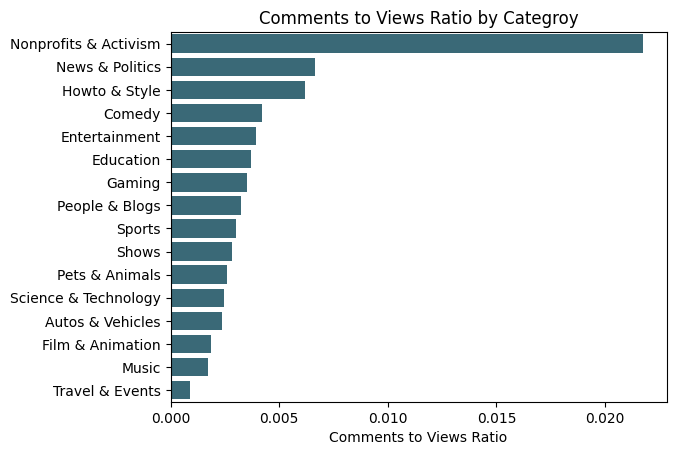

In [522]:
# Calcualte ratio
comments_views_ratio = category_aggs.select(
    pl.col("category_id"),
    comments_views_ratio=pl.col("total_comment_count") / pl.col("total_views")
).sort("comments_views_ratio", descending=True)

# Barplot
sns.barplot(
    y=comments_views_ratio["category_id"].to_numpy(),
    x=comments_views_ratio["comments_views_ratio"].to_numpy(),
    color="#306e81",
)
plt.title("Comments to Views Ratio by Categroy")
plt.xlabel("Comments to Views Ratio")
plt.show()

In [523]:
channel_aggs.write_parquet("./data/channel_aggs.parquet")
category_aggs.write_parquet("./data/category_aggs.parquet")